In [16]:
import pandas as pd
import seaborn as sns

In [17]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [18]:
df = pd.read_csv('all_snpgenie_population_summary.csv')

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split('p').str[-1].astype(int)

In [19]:
# get parental values
p0_dcv_pi = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi'].values[0]
p0_dcv_pi_coding = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi_coding'].values[0]
p0_dcv_pi_noncoding = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi_noncoding'].values[0]

# get parental values
p0_crpv_pi = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi'].values[0]
p0_crpv_pi_coding = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi_coding'].values[0]
p0_crpv_pi_noncoding = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi_noncoding'].values[0]

In [20]:
df = df[df['genotype']!='parental']

In [21]:
df['pi_fullgenome'] = df['pi']

df = df[['pi_fullgenome','pi_coding','pi_noncoding','genotype','rep','passage', 'virus']]

df_pop_long = pd.wide_to_long(df, stubnames="pi", 
                              sep="_", 
                              i = ['genotype','rep','passage', 'virus'], 
                              j='measure',
                              suffix=r'\w+')
df_pop_long = df_pop_long.reset_index()

In [22]:
df_pop_long.head()

,genotype,rep,passage,virus,measure,pi
0,W,a,1,DCV,fullgenome,0.000231
1,W,a,1,DCV,coding,0.000153
2,W,a,1,DCV,noncoding,0.000713
3,W,b,1,DCV,fullgenome,0.000245
4,W,b,1,DCV,coding,0.000154


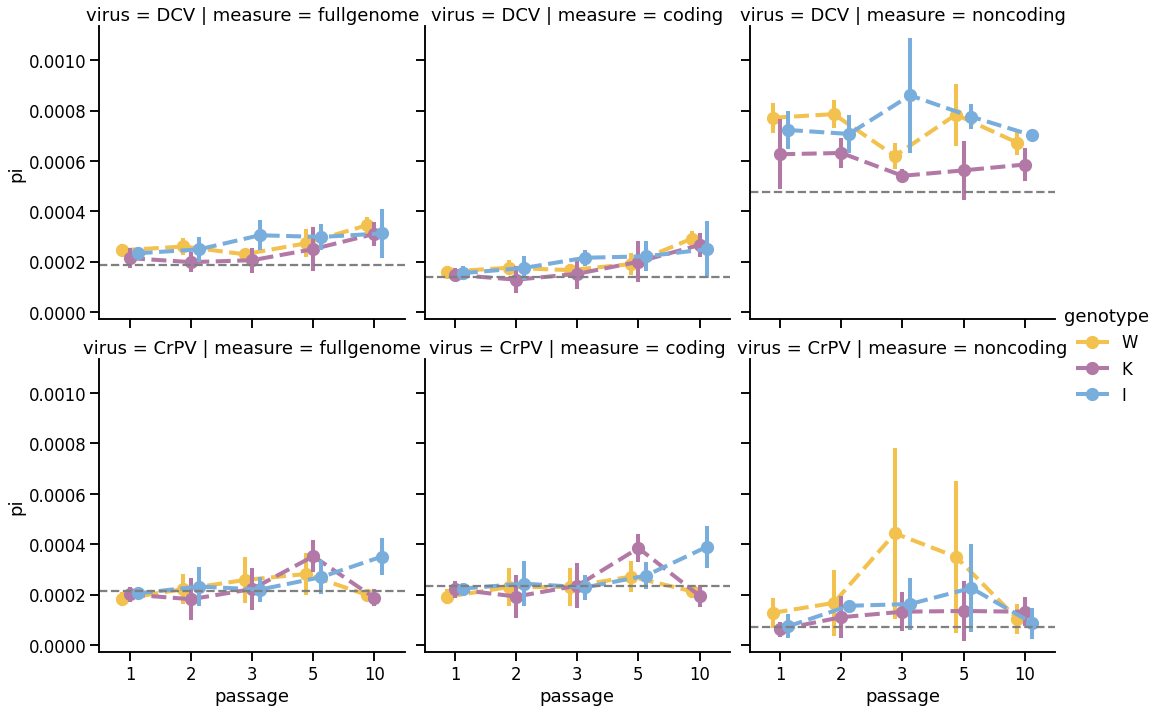

In [8]:
sns.set_context("talk") 

g = sns.catplot(df_pop_long, 
                x='passage', 
                y='pi', 
                col='measure', 
                row='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'virus = DCV | measure = fullgenome':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = DCV | measure = coding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi_coding, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = DCV | measure = noncoding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi_noncoding, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV | measure = fullgenome':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV | measure = coding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi_coding, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV | measure = noncoding':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi_noncoding, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.coding.noncoding.pdf")

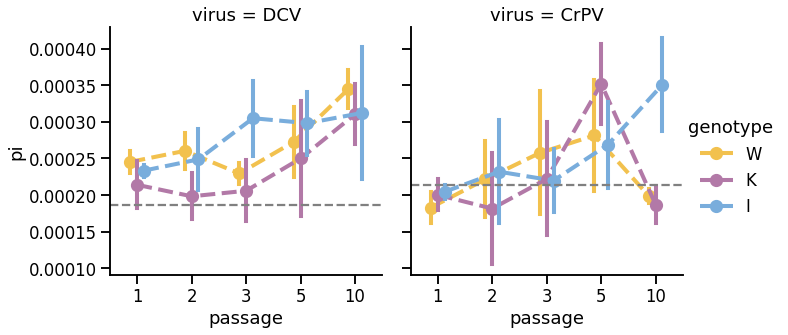

In [9]:
sns.set_context("talk") 

g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome')], 
                x='passage', 
                y='pi', 
                col='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.full_genome.pdf")

## DCV

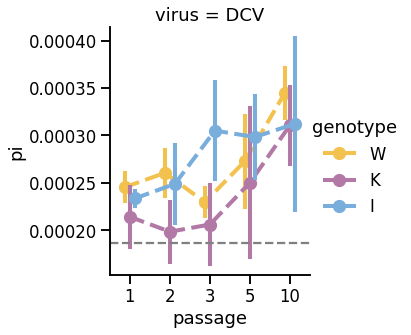

In [10]:
sns.set_context("talk") 

g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='DCV')], 
                x='passage', 
                y='pi', 
                col='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.full_genome.pdf")

In [11]:

df_pi = df_pop_long[(df_pop_long['measure']=='fullgenome')]
df_pi['replicate'] = df_pi['virus'] + df_pi['genotype'] + df_pi['rep']

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_44493/1244348584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pi['replicate'] = df_pi['virus'] + df_pi['genotype'] + df_pi['rep']


In [12]:
%load_ext rpy2.ipython

In [13]:
%%R -i df_pi 

library(lme4)
library(rstatix)
library(ggpubr)
library(ggplot2)
library(ggdist) #for stat halfeye
library(DHARMa) #THE STAR OF THE SHOW INTERPRETATION OF MODEL FIT
library(MASS)

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘rstatix’


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    filter


R[write to console]: Lade nötiges Paket: ggplot2

R[write to console]: This is DHARMa 0.4.7. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa')

R[write to console]: 
Attache Paket: ‘MASS’


R[write to console]: Das folgende Objekt ist maskiert ‘package:rstatix’:

    select




In [16]:
%%R

# Subset the data
df_subset <- subset(df_pi, measure == 'fullgenome')
df_subset <- subset(df_subset, virus == 'DCV')

df_subset$pi_log <- log10(df_subset$pi)

# Convert genotype to factor
df_subset$genotype <- factor(df_subset$genotype)

# Relevel the genotype factor with W as reference
df_subset$genotype <- relevel(df_subset$genotype, ref = "W")

In [17]:
%%R

# Basic linear model
lm_model <- lmer(pi_log ~ passage + genotype + passage:genotype + (1|replicate), data = df_subset)

# Analysis of model
summary(lm_model)

Linear mixed model fit by REML ['lmerMod']
Formula: pi_log ~ passage + genotype + passage:genotype + (1 | replicate)
   Data: df_subset

REML criterion at convergence: -73.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.47988 -0.71600 -0.02305  0.47702  2.09562 

Random effects:
 Groups    Name        Variance Std.Dev.
 replicate (Intercept) 0.001651 0.04063 
 Residual              0.003857 0.06210 
Number of obs: 44, groups:  replicate, 9

Fixed effects:
                   Estimate Std. Error  t value
(Intercept)       -3.644460   0.036160 -100.786
passage            0.016637   0.005856    2.841
genotypeI          0.036834   0.050609    0.728
genotypeK         -0.085154   0.050609   -1.683
passage:genotypeI -0.005577   0.007720   -0.722
passage:genotypeK  0.004702   0.007720    0.609

Correlation of Fixed Effects:
            (Intr) passag gntypI gntypK pssg:I
passage     -0.606                            
genotypeI   -0.715  0.433                     
genotypeK

In [125]:
%%R 

# we don't have so much data
# hence removing the interaction term, we have more power (less parameters to fit)
simplified_model <- lmer(pi_log ~ passage + genotype+ (1|replicate), data = df_subset)

# Analysis of model
summary(simplified_model)

# p-values are intentionally not shown because there is ongoing statistical debate about 
# how to calculate appropriate p-values for these models
# The t-values (values > |2| suggest statistical significance)

Linear mixed model fit by REML ['lmerMod']
Formula: pi_log ~ passage + genotype + (1 | replicate)
   Data: df_subset

REML criterion at convergence: -87.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96888 -0.61095 -0.04049  0.55104  2.19398 

Random effects:
 Groups    Name        Variance Std.Dev.
 replicate (Intercept) 0.001642 0.04053 
 Residual              0.003869 0.06220 
Number of obs: 44, groups:  replicate, 9

Fixed effects:
             Estimate Std. Error  t value
(Intercept) -3.643263   0.030912 -117.858
passage      0.016317   0.003045    5.359
genotypeI    0.013556   0.040413    0.335
genotypeK   -0.065259   0.040413   -1.615

Correlation of Fixed Effects:
          (Intr) passag gntypI
passage   -0.369              
genotypeI -0.648 -0.035       
genotypeK -0.648 -0.035  0.507


In [126]:
%%R 

# compare the two models
anova(simplified_model, lm_model)

# If the comparison shows no significant difference between models, 
# the simpler model without interaction terms would be preferred.

# --> no significant difference 
# --> simpler model is prefered, has also more defrees of freedom 

R[write to console]: refitting model(s) with ML (instead of REML)



Data: df_subset
Models:
simplified_model: pi_log ~ passage + genotype + (1 | replicate)
lm_model: pi_log ~ passage + genotype + passage:genotype + (1 | replicate)
                 npar     AIC     BIC logLik deviance  Chisq Df Pr(>Chisq)
simplified_model    6 -102.10 -91.395 57.050  -114.10                     
lm_model            8 -100.32 -86.044 58.159  -116.32 2.2174  2       0.33


In [127]:
%%R
anova(simplified_model)

Analysis of Variance Table
         npar  Sum Sq Mean Sq F value
passage     1 0.11006 0.11006 28.4486
genotype    2 0.01702 0.00851  2.1997


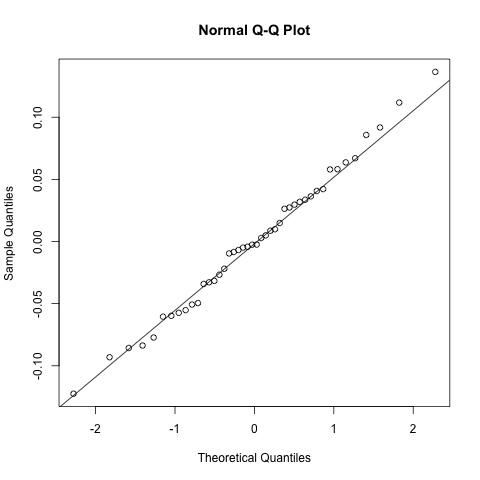

In [129]:
%%R

# Check residuals
plot(simplified_model)
qqnorm(resid(simplified_model))
qqline(resid(simplified_model))

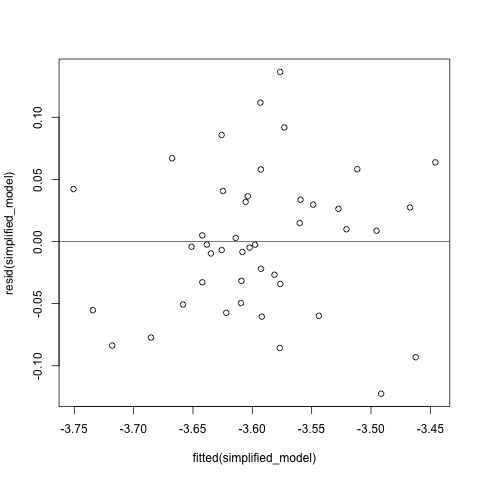

In [130]:
%%R 

# Plot fitted vs residuals
plot(fitted(simplified_model), resid(simplified_model))
abline(h=0, col="red")

# Residuals vs Fitted
# If you find equally spread residuals around a horizontal line without distinct patterns, 
# that is a good indication you don’t have non-linear relationships.
# --> looks good

In [132]:
%%R

# Random effects
ranef(simplified_model)

$replicate
       (Intercept)
DCVIa  0.020698574
DCVIb -0.024901085
DCVIc  0.004202511
DCVKa  0.033770139
DCVKb -0.058447033
DCVKc  0.024676894
DCVWa -0.015238417
DCVWb  0.012970081
DCVWc  0.002268336

with conditional variances for “replicate” 


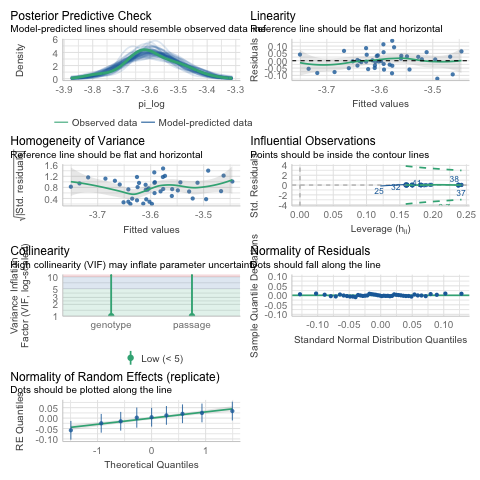

In [133]:
%%R 

# Check model assumptions
library(performance)
check_model(simplified_model)

# Slight heteroscedasticity might be present but not severe enough to invalidate the model
# Cook's distance values appear acceptable
# Overall suggests residuals are approximately normally distributed
# Supports the assumption of normally distributed random effects

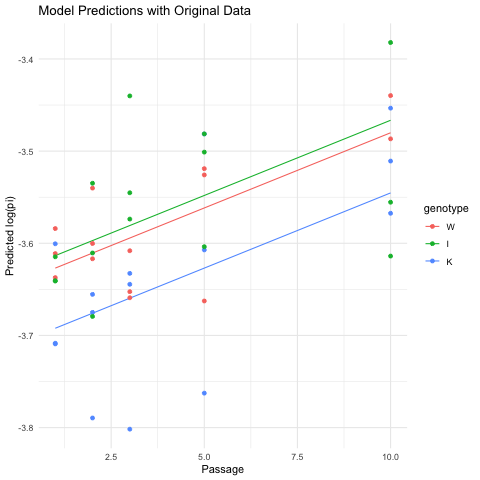

In [136]:
%%R 
# Create prediction data frame
new_data <- expand.grid(
  passage = seq(min(df_subset$passage), max(df_subset$passage), length.out = 100),
  genotype = unique(df_subset$genotype)
)

# Get predictions
new_data$predicted <- predict(simplified_model, newdata = new_data, re.form = NA)

# Create plot
library(ggplot2)
ggplot(new_data, aes(x = passage, y = predicted, color = genotype)) +
  geom_line() +
  geom_point(data = df_subset, aes(y = pi_log)) +
  theme_minimal() +
  labs(x = "Passage", y = "Predicted log(pi)", 
       title = "Model Predictions with Original Data")

## CrPV

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_44493/938843301.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='CrPV')],


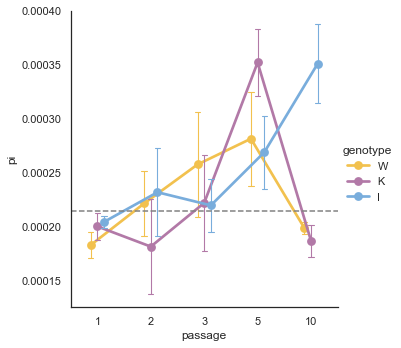

In [30]:
#sns.set_context("talk") 
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('white')

g = sns.catplot(df_pop_long[(df_pop_long['measure']=='fullgenome') & (df_pop_long['virus']=='CrPV')], 
                x='passage', 
                y='pi', 
                #row='rep', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                #linestyles='--',
                dodge=0.25,
                errorbar='se',
                palette=our_color_palette, 
                errwidth=1.1, 
                  capsize=0.1
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--') 
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
g.savefig("/Users/lfuhrmann/Downloads/nucleotide_diversity.full_genome.crpv.pdf")

In [14]:
%%R

df_subset <- subset(df_pi, measure == 'fullgenome')
df_subset <- subset(df_subset, virus == 'CrPV')
df_subset$pi_log <- log10(df_subset$pi)

# Relevel the genotype factor with W as reference
df_subset$genotype <- factor(df_subset$genotype)
df_subset$genotype <- relevel(df_subset$genotype, ref = "W")

In [28]:
%%R 

model <- lmer(pi_log ~ genotype +  passage + I(passage>=10)+ genotype:I(passage >= 10)+ (1|replicate),
              data = df_subset)
summary(model)

Linear mixed model fit by REML ['lmerMod']
Formula: 
pi_log ~ genotype + passage + I(passage >= 10) + genotype:I(passage >=  
    10) + (1 | replicate)
   Data: df_subset

REML criterion at convergence: -49.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.04137 -0.45229  0.07875  0.49129  1.79420 

Random effects:
 Groups    Name        Variance Std.Dev.
 replicate (Intercept) 0.001066 0.03265 
 Residual              0.010041 0.10021 
Number of obs: 45, groups:  replicate, 9

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                    -3.769205   0.046437 -81.169
genotypeI                      -0.002303   0.048828  -0.047
genotypeK                      -0.007813   0.048828  -0.160
passage                         0.046098   0.011292   4.082
I(passage >= 10)TRUE           -0.393850   0.104335  -3.775
genotypeI:I(passage >= 10)TRUE  0.244454   0.091474   2.672
genotypeK:I(passage >= 10)TRUE -0.021083   0.091474  -0.230

C

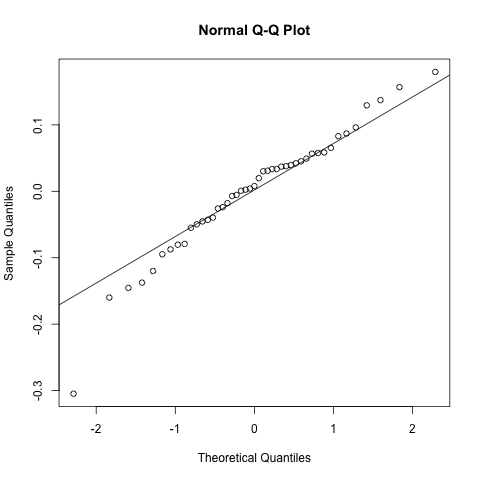

In [29]:
%%R

# Check residuals
plot(model)
qqnorm(resid(model))
qqline(resid(model))

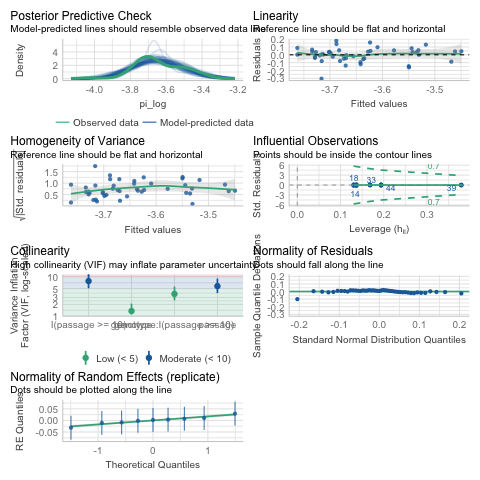

In [30]:
%%R

# Check model assumptions
library(performance)
check_model(model)

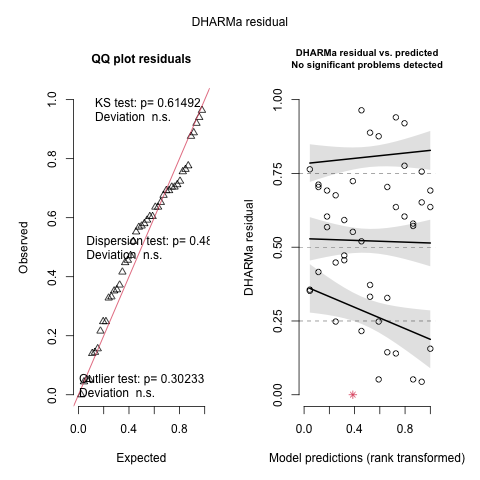

In [32]:
%%R

library(DHARMa)
simulationOutput <- simulateResiduals(model)
plot(simulationOutput)